In [81]:
# 3D plot af aktier
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn import preprocessing
import pandas as pd

def getStockQuotes(symbol:str, start:str=None, end:str=None) -> []:
    import yfinance as yf
    import pandas as pd
    return yf.download(symbol, start=start, end=end, progress=False)

def getStockQuotesFromList(symbols:[], column:str=None, start:str=None, end:str = None) -> []:
    result = []
    for symbol in symbols:
        if column is None:
            result.append(getStockQuotes(symbol, start, end))
        else:
            result.append(getStockQuotes(symbol, start, end)[column])
    
    return result 

def normalizeQuotes(quotes:[]) -> []:
    result = []
    for quote in quotes:
        result.append(preprocessing.normalize([quote]))
    
    return result

def prependZeros(lists:[]) -> []:
    # find antallet af længste samling        
    r = []
    count = 0
    for list in lists:
        if len(list) > count:
            count = len(list)
                
    for list in lists:        
        if len(list) < count:
            n = count - len(list)            
            list = np.concatenate((np.zeros(n), list))
            
  
        
        r.append(list)    
    return r

In [82]:
stock_codes = ['TSLA', 'PCRFY', 'VWAGY', '300750.SZ']
stock_quotes_in_list = getStockQuotesFromList(stock_codes, 'Close')#, '2021-01-01', '2021-04-30')
stock_quotes_in_list = prependZeros(stock_quotes_in_list)
stock_quotes_in_list = normalizeQuotes(stock_quotes_in_list)



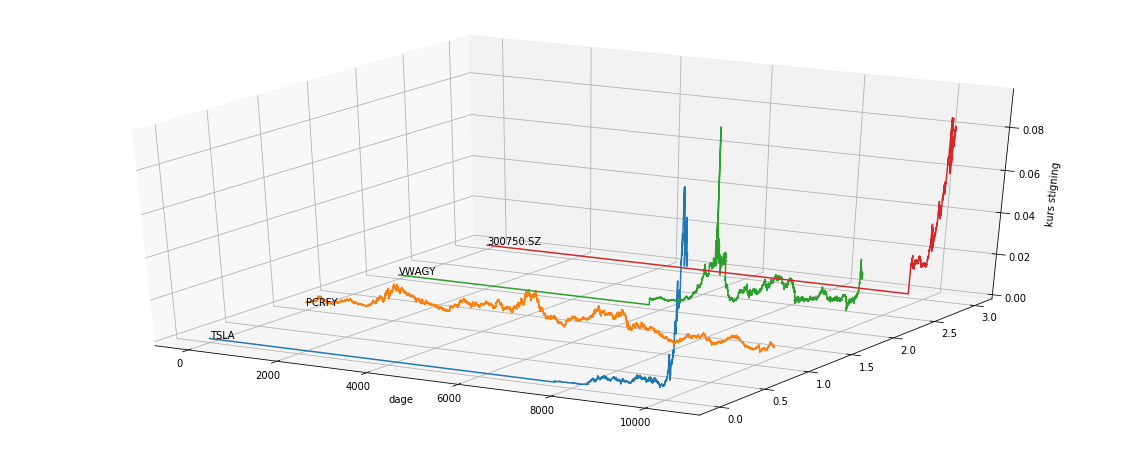

"\nVores 3D plot af Tesla og relaterede aktier viser, at der kan være en sammenhæng mellem stigning af aktier for Tesla og Tesla's batterileverandør. Det kunne tyde på at aktierne enten influerer hinanden eller påvirkes af de samme faktorer. På samme måde kan en svag stigning i VW aktien også ses på samme tid.\n"

In [83]:
# 
fig = plt.figure(figsize=(20,8))

ax = plt.axes(projection='3d')

for idx, stock in enumerate(stock_quotes_in_list):
    stock = stock.flatten()
    line = ax.plot3D(np.arange(len(stock)),[idx for _ in stock], stock)    
    ax.text3D(0,idx, 0, stock_codes[idx])

ax.set_xlabel("dage")
ax.set_zlabel("kurs stigning")

plt.show()

"""
Vores 3D plot af Tesla og relaterede aktier viser, at der kan være en sammenhæng mellem stigning af aktier for Tesla og Tesla's batterileverandør. Det kunne tyde på at aktierne enten influerer hinanden eller påvirkes af de samme faktorer. På samme måde kan en svag stigning i VW aktien også ses på samme tid.
"""

In [92]:
import plotly.express as px

symbols = pd.Series()
closes = pd.Series()
days = pd.Series()
zs = pd.Series()

# gennemløb lister af aktiekurser
for idx, stock_quotes in enumerate(stock_quotes_in_list):
    # kurser skal være 1D
    quotes = stock_quotes.flatten()    
    
    # Opret series for properties vi viser i 3D
    s = pd.Series(stock_codes[idx] for _ in quotes) # Aktiens symbol
    c = pd.Series(quotes)                           # Aktiens pris
    d = pd.Series(np.arange(0, len(quotes)))        # Dage
    z = pd.Series([idx for _ in quotes])            # z-index
    
    # append til Series
    symbols = symbols.append(s) 
    closes = closes.append(c)
    days = days.append(d)
    zs = zs.append(z)
    
# Opret dataframe med Series.
df = pd.DataFrame({
    'Symbol': symbols,
    'Close': closes,
    'Days': days,
    'z': zs
})

# Vis figur med alle grafer i dataframe.
fig = px.line_3d(df, x="Days", y="Close", z="z", color='Symbol')
fig['layout']['xaxis']['autorange']="reversed"
fig.show()